In [1]:
from pysal.contrib.points.process import PoissonPointProcess, PoissonClusterPointProcess
from pysal.contrib.points.window import Window, poly_from_bbox
from pysal.contrib.points.pointpattern import PointPattern
import pysal as ps
from pysal.contrib import shapely_ext
#import shapely
%matplotlib inline
import matplotlib.pyplot as plt

/home/serge/Dropbox/p/pysal/src/pysal/pysal/core/IOHandlers/__init__.py:25: UserWarning: SQLAlchemy and Geomet not installed, database I/O disabled
  warnings.warn('SQLAlchemy and Geomet not installed, database I/O disabled')


In [2]:
# open the virginia polygon shapefile
va = ps.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]

In [3]:
# Create the exterior polygons for VA from the union of the county shapes
state = shapely_ext.cascaded_union(polys)
# create window from virginia state boundary
window = Window(state.parts)

In [4]:
window.bbox

[-83.67526245117188, 36.541481018066406, -75.24258422851562, 39.45690155029297]

In [5]:
window.centroid

(-78.85183583334933, 37.51851209850039)

In [6]:
samples = PoissonPointProcess(window, 200, 1, conditioning=False, asPP=False)

In [7]:
csr = PointPattern(samples.realizations[0])

In [8]:
cx, cy = window.centroid

In [9]:
cx

-78.85183583334933

In [10]:
cy

37.51851209850039

In [11]:
west = csr.points.x < cx

south = csr.points.y < cy
east = 1 - west
north = 1 - south

In [12]:
quad = 1 * east * north +  2 * west * north + 3 * west * south + 4 * east * south

In [13]:
quad

0      2
1      4
2      4
3      1
4      4
5      1
6      1
7      4
8      2
9      3
10     2
11     4
12     2
13     4
14     4
15     2
16     2
17     3
18     4
19     4
20     1
21     2
22     3
23     3
24     3
25     3
26     1
27     3
28     3
29     3
      ..
170    3
171    3
172    3
173    4
174    3
175    4
176    3
177    4
178    4
179    1
180    2
181    3
182    3
183    1
184    3
185    1
186    4
187    1
188    4
189    4
190    3
191    2
192    3
193    4
194    3
195    4
196    1
197    4
198    4
199    1
dtype: int64

In [14]:
csr.add_marks([quad], mark_names = ['quad'])

In [15]:
quad

0      2
1      4
2      4
3      1
4      4
5      1
6      1
7      4
8      2
9      3
10     2
11     4
12     2
13     4
14     4
15     2
16     2
17     3
18     4
19     4
20     1
21     2
22     3
23     3
24     3
25     3
26     1
27     3
28     3
29     3
      ..
170    3
171    3
172    3
173    4
174    3
175    4
176    3
177    4
178    4
179    1
180    2
181    3
182    3
183    1
184    3
185    1
186    4
187    1
188    4
189    4
190    3
191    2
192    3
193    4
194    3
195    4
196    1
197    4
198    4
199    1
dtype: int64

In [22]:
csr_q = csr.explode('quad')

In [23]:
len(csr_q)

4

In [24]:
csr

In [25]:
csr.summary()

Point Pattern
200 points
Bounding rectangle [(-83.5850605805,36.5796689582), (-75.6568602245,39.3220681169)]
Area of window: 21.7422899861
Intensity estimate for window: 9.19866307219
           x          y  quad
0 -79.070601  37.753815     2
1 -77.897053  36.859739     4
2 -77.693233  37.073287     4
3 -77.255492  37.723716     1
4 -76.377539  36.763075     4


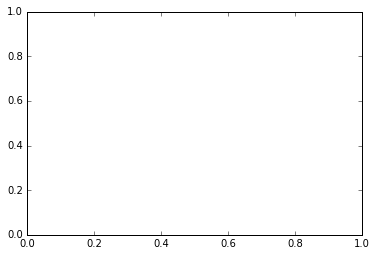

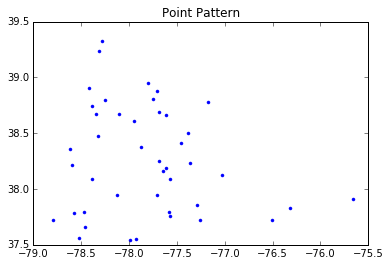

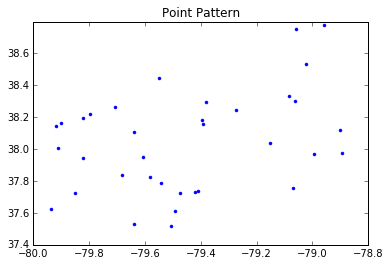

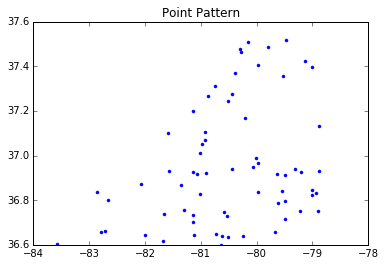

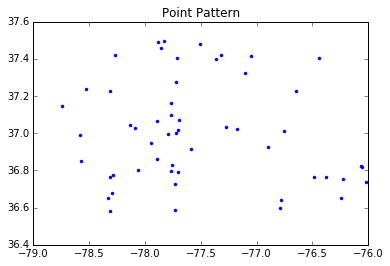

In [30]:
plt.xlim()
for ppn in csr_q:
    ppn.plot()

In [32]:
x0, y0, x1, y1 = csr.mbb
ylim = (y0, y1)
xlim = (x0, x1)

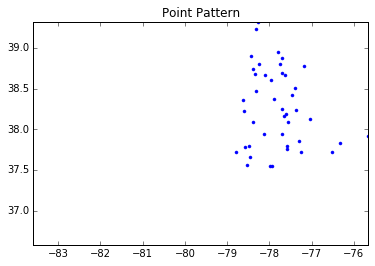

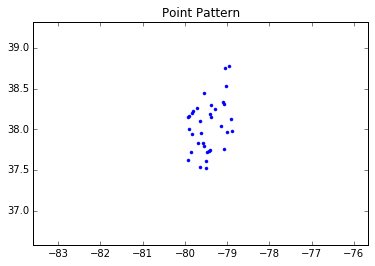

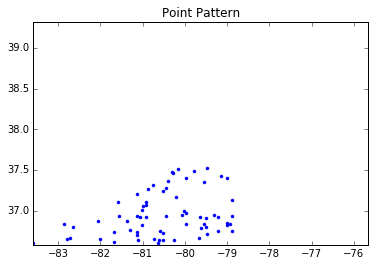

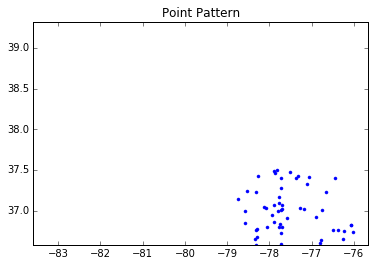

In [34]:

for ppn in csr_q:
    ppn.plot()
    plt.xlim(xlim)
    plt.ylim(ylim)